# Some history

## Pen & paper exercises 

### Timescales of stellar evolution

There are three main timescales in which stars evolve. These are the dynamical, thermal and nuclear timescales. Even without knowing the equations of stellar structure and evolution we can do some estimates on the value of these quantities. Compute these without a calculator! We only care about the order of magnitude of these timescales, which given all the approximations done is all we can do. For solar properties, use the following for the mass, radius and luminosity:

$$R_\odot\sim 7\times 10^{10}\;\mathrm{[cm]},\quad M_\odot \sim 2\times 10^{33}\;\mathrm{[g]},\quad L_\odot \sim 4\times 10^{33}\;\mathrm{[erg\;s^{-1}]}$$

- Thermal timescale: One of the main early hypothesis to explain the energy source of the Sun was that it originated from its slow contraction into its own gravitational potential. In such a case, a rough estimate of the energy the Sun would have radiated through its life is given by the negative of the gravitational potential energy $E_\mathrm{g}$:

    $$E_\mathrm{g} \sim -\frac{GM_\odot^2}{R_\odot}.$$

    Assuming that the luminosity of the Sun has always been its current one, $L_\odot$, compute the age of the Sun under the assumption that it is only powered by contraction.

- Dynamical timescale: For most of their lives stars are very close to hydrostatic equilibrium, carefully balancing their gravities against the support of a pressure gradient. Whenever these two forces are misbalanced, the star will evolve in what is known as the dynamical timescale. Estimate this timescale by computing the time it would take for the surface of the sun to free-fall all the way to its center if all forces opposing gravity would be removed. For simplicity assume that the gravitational acceleration is constant and equal to its present one.

- Nuclear timescale: As we now know, most stars are powered by nuclear reactions. Masses of isotopes are normally given in terms of the atomic mass unit $m_\mathrm{u}=1.661\times 10^{-24}\;\mathrm{g}$, defined as $1/12$ of the mass of a carbon-12 atom. The mass of a hydrogen atom is $m_\mathrm{H}=1.007825m_\mathrm{u}$ and that of a helium atom is $m_\mathrm{He}=4.002602 m_\mathrm{u}$, such that if four hydrogen atoms are fused into a helium atom there is a mass deficit leading to a release of energy $(4m_\mathrm{H}-m_\mathrm{He})c^2\sim 4\times 10^{-5}\;\mathrm{[erg]}$. With this information, estimate the lifetime of the Sun as a core-hydrogen burning star. For simplicity, assume the Sun has a constant luminosity and is entirely composed of hydrogen, 10% of which is burned into Helium during core-hydrogen burning.

## Solution to pen & paper exercises

## Julia basics

For the first class we provide a computational example rather than exercises. All computational exercises will be shown using the [*julia*](https://julialang.org/) programming language, but the code provided can be easily translated to other languages such as python. The main benefit of julia is that it is a language that is simple to write but can still have a performance comparable to traditional compiled languages. A good overview of the language can be found in the official [manual](https://docs.julialang.org/en/v1/manual/getting-started/), but below we show some of the basic functionality that you will need to use.

First of all, we illustrate the basic usage of julia. A normal thing you will do at the beginning of any notebook or program is to include packages. Our life is made significantly easier by people who provide these packages! To do this, one makes use of the `using` keyword. Below we include the packages we will be using in this example.

In [1]:
using DataFrames     # Used to deal with tabular data
using Plots          # Provides a multitude of plotting routines
using CSV            # Efficient reading of files in "comma separated values" format
using LaTeXStrings   # Makes it easy to write LaTeX strings

Whenever you work on a fresh environment you will find the above code fails, as the packages are not installed. As described in the error message you can correct this by running (in a different cell) `import Pkg; Pkg.add("DataFrames")`, and similarly for the other packages. Once this is done for a package, it will remain installed in your environment, and you don't need to use `Pkg.add` again (it is safe to erase the cells with that command).

The syntax of julia should be familiar to those with a python background. Assigning numerical variables and performing arithmetic operations on them is straightforward.

In [2]:
a = 2.0
b = pi # the definition of pi is included by default

c = a+b # addition
d = b^a # exponentiation
e = sin(b) # basic mathematical functions are also defined in the language, no need to include a package

print("c=$(c), b=$(d), c=$(e)") # $() notation is used to read the value in parenthesis into the string

c=5.141592653589793, b=9.869604401089358, c=0.0

One option that can let you increase the readability of code is the use of greek characters. To include these in a code block you can write `\beta` and then press tab, which will replace them with the corresponding greek character.

In [3]:
β=1;  # Using ';' at the end of a line will hide its output

You also have access to basic keywords for control flow, including `if` blocks and `for` loops. Here some small notational variations arise with respect to `python`. Blocks of code are not defined by indentation but by the use of the `end` keyword.

In [4]:
a = 1
b = 3

if a < 2 && b < 2   # && stands for 'and'
    print("if was successful")
elseif a < 2 || b < 2   # || stands for 'or'
    print("elseif was successful")
else
    printf("Neither if or elseif were successful")
end
print("\n") # print a line break

# Add up all digits between 1 and 10 using a for loop
summation = 0
for i in 1:10
    summation = summation+i
end
print("Adding all numbers between 1 and 10 gives us $(sum)")

elseif was successful
Adding all numbers between 1 and 10 gives us sum

We can also define functions using the `function` keyword.

In [5]:
function add1(x)
    return x+1
end

add1(1)

2

We often deal not just with scalars but also vectors or matrices. We can define a vector covering a range of values using the `LinRange` function.

In [6]:
xvals = LinRange(-5.0,5.0,11) # Create a vector with elements from -5.0 to 5.0 with 11 elements.

11-element LinRange{Float64, Int64}:
 -5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0

Contrary to python, arrays in julia start at position 1, so if you attempt to access `xvals[0]` you will get an error.

Beware that many operations on vectors will not work as you might naively expect. If you try computing `xvals^2`, an error will be thrown as the `^` operation is not defined between a vector and an integer. You could think that the above operation is ambiguous, do we mean that we want to take the square of each element of the vector or instead that we want to take the dot product of xvals with itself? To explicitly state that an operation is meant to be done element by element, one can use a `.` before the operation. Further information on this notation can be found [here](https://docs.julialang.org/en/v1/manual/functions/#man-vectorized).

In [7]:
xvals.^2

11-element Vector{Float64}:
 25.0
 16.0
  9.0
  4.0
  1.0
  0.0
  1.0
  3.999999999999999
  9.0
 16.0
 25.0

This can be done with any function. For instance the code below will apply our `add1` function to each element of the array.

In [8]:
add1.(xvals)

11-element Vector{Float64}:
 -4.0
 -3.0
 -2.0
 -1.0
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0

Finally, the `Plots` package allows us to easily make different kinds of plots. The example below shows a (sparsely) sampled plot of sine and cosine. The plot can be created by calling the `plot(...)` function, while things are added to it by calling the `plot!()` function. Using `!` as part of a function name is part of the style guide of julia to identify functions which modify their arguments. For example, the `sort(x)` function will return a copy of the vector `x` which is sorted, while `sort!(x)` will modify the vector `x` into a sorted version of itself (known as in place sorting).

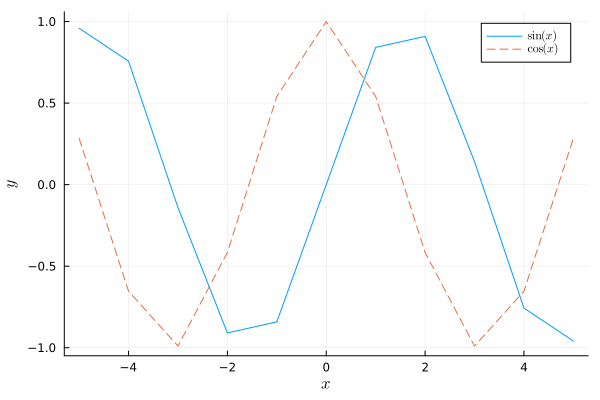

In [9]:
yvals = sin.(xvals)
yvals2 = cos.(xvals)
# The LaTeX strings package allows us to write LaTeX without needing to escape backslashes
# (i.e., we can write L"\sin(x)" instead of "$\\sin(x)$").
plot(xlabel=L"$x$", ylabel=L"$y$") 
plot!(xvals, yvals, label=L"$\sin(x)$")
plot!(xvals, yvals2, label=L"$\cos(x)$",linestyle=:dash)

### Constructing an HR diagram with Gaia data

To run this lab locally you will need three additional files, {download}`solar_spectrum.dat<./solar_spectrum.dat>`, {download}`gaia_100pc_par_over_err_100.csv<gaia_100pc_par_over_err_100.csv>` and {download}`passband.dat<passband.dat>`.

The radiation coming out of a star can be approximated to first order using black body radiation. In this case the intensity is described by Planck's law,

$$B_\lambda(\lambda,T) = \frac{2h c^2}{\lambda^5}\frac{1}{\exp\left(\frac{hc}{\lambda k_\mathrm{B}T}\right)-1},$$

which describes the energy flux per unit area and unit solid angle. This function peaks at a value of $\lambda_\mathrm{max}=hc/(4.965 k_\mathrm{B}T)$. We can use this to normalize the distribution such that its peak value is $1$, which is useful for visualization. Below we define both $B_\lambda$ and its normalized version.

In [10]:
h = 6.6261e-27      # Planck's constant, cm^2 g s^-1
c = 2.99792458e10   # speed of light cm s^-1
k_B = 1.3807e-16    # Boltzmann constant erg K-1
σ = 2*π^5*k_B^4/(15*h^3*c^2) # Stefan-Boltzmann constant
function B_λ(λ,T) #λ in nm, T in Kelvin
    λ_cm = λ*1e-7
    return 2*h*c^2/λ_cm^5*(1/(exp(h*c/(λ_cm*k_B*T))-1))
end;
function normalized_B_λ(λ,T) #λ in nm, T in Kelvin
    peak_λ = h*c/(4.965*k_B*T)*1e7 #in nm
    return B_λ(λ,T)/B_λ(peak_λ,T)
end;

normalized_B_λ (generic function with 1 method)

To see what we mean when we say the spectrum of a star resembles that of a black body, we can check a solar spectrum. The flux that would come out of the surface of the sun per unit wavelength can be obtained by integration of $B_\lambda$ over a half sphere, with a $\cos(\theta)$ correction to account for projection effects,

$$F_\lambda = \int_0^{2 \pi}d\phi\int_0^{\pi/2}B_\lambda(\lambda,T)\cos(\theta)\sin(\theta) d\theta d\phi=\pi B_\lambda.$$

Integrated over all wavelengths it can be shown that the total flux is given by $F=\sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. While travelling through vacuum the flux scales as the inverse of the square distance, such that the solar flux observed at Earth can be computed as

$$F_{\lambda,\mathrm{Earth}} = \pi B_\lambda \left(\frac{R_\odot}{1\;\mathrm{[au]}}\right)^2.$$

Below we compare this black body prediction to a [standard solar spectrum](https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html) from the National Renewable Energy Laboratory of the US. Here we use a temperature of $T_\mathrm{eff}=5772\;\mathrm{K}$ for the Sun, which is a standard value defined by the [International Astronomical Union](https://www.iau.org/static/resolutions/IAU2015_English.pdf).

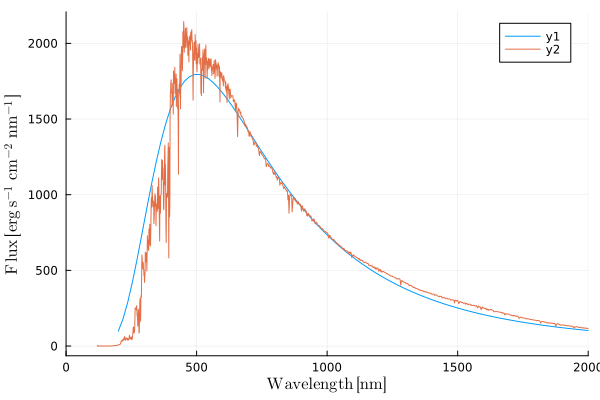

In [11]:
 # We read a CSV file into a dataframe. The first line of the file contains the column names
solar_spectrum = CSV.read("solar_spectrum.dat", header=1, delim=" ", ignorerepeated=true, DataFrame)

plot(xlabel=L"$\mathrm{Wavelength\;[nm]}$", ylabel=L"$\mathrm{Flux}\; [\mathrm{erg\;s^{-1}\;cm^{-2}\;nm^{-1}}]$", xlims=[0,2000])

xvals = LinRange(200.0,2000.0,100)
au = 1.5e13
Rsun = 7e10
plot!(xvals, pi*B_λ.(xvals,5772)/1e7/(au/Rsun)^2) # 1e7 factor converts from centimeter to nanometer
plot!(solar_spectrum.lambda, solar_spectrum.flux) # columns in a dataframe can be easily accesible by name

In this exercise we will work with [Gaia](https://www.esa.int/Science_Exploration/Space_Science/Gaia) data. Gaia is a space mission that is performing astrometry of over a billion targets, providing an incredible picture on the structure of our Galaxy. Using parallaxes we can determine the distance to these stars and thus infer their absolute magnitudes. Gaia also provides photometric measurements in three bands, called $G$, $G_{RP}$ and $G_{BP}$. The G band is a broadband filter, while the $G_{RP}$ and $G_{BP}$ filters are more sensitive to short and long wavelengths respectively. The sensitivity of each filter to light at different wavelengths is described by the passbands, which are shown below compared to a (normalized) black body spectrum with the effective temperature of the Sun. For simplicity from here on we refer to the $G_{RP}$ and $G_{BP}$ filters as RP and BP.

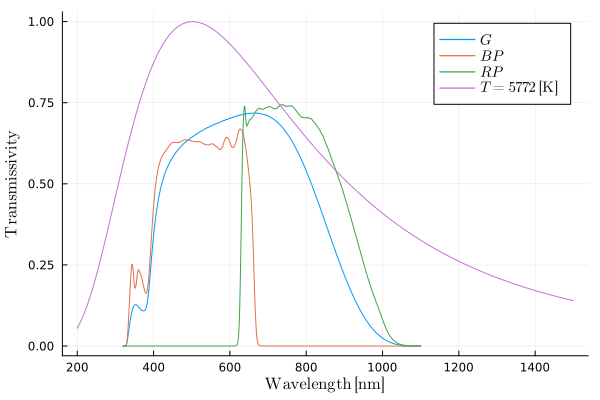

In [12]:
passbands = CSV.read("passband.dat", header=1, delim=" ", ignorerepeated=true, DataFrame)
plot(xlabel=L"$\mathrm{Wavelength\;[nm]}$", ylabel=L"\mathrm{Transmissivity}", legendfontsize=10)
plot!(passbands.lambda, passbands.G_pb, label=L"$G$")
plot!(passbands.lambda, passbands.BP_pb, label=L"BP")
plot!(passbands.lambda, passbands.RP_pb, label=L"RP")

xvals = LinRange(200.0,1500.0,100)
plot!(xvals, normalized_B_λ.(xvals,5772), label=L"$T=5772\;\mathrm{[K]}$")

The [Gaia archive](https://gea.esac.esa.int/archive/) gives us a nice interface to query results from this mission (although queries are limited to 2000 results). Here we read a file `gaia_100pc_par_over_err_100.csv` that containts a sample of stars within $100$ parsecs for which the error in the measured parallax is smaller that $1\%$ of the total. As a quick reminder on what parallax means, it refers to the angular displacement of stars as seen by two different observers. When this angle is taken between two measurements at opposite ends of a circle with a distance of $1\;\mathrm{au}$ (so, for an observer on Earth), the parallax $p$ is half the of the angular displacement measured against a background of distant "fixed" stars. A parsec corresponds to the distance at which a source has a parallax of $1''$ ($''$ stands for arcsecond, which corresponds to $1/(60\times 3600)$ of a degree). In this way the distance of a source is given by

$$\frac{d}{1\;\mathrm{[pc]}} = \frac{1}{p/1''}.$$

Knowing the distance we can compute the absolute magnitude $M$ of a star of known apparent magnitude $m$,

$$M=m-5(\log_{10}d_\mathrm{pc}-1),$$

where $d_\mathrm{pc}$ is the distance to the source in parsecs. Using this, below we read the datafile obtained from the Gaia archive, compute the absolute G magnitude of each object using the distance obtained from the parallax (note that the parallaxes are in units of milliarcseconds), and plot a Hertzsprung-Russell diagram. The x-coordinate of the diagram is the color, obtained from substracting the magnitudes on the BP and RP filters. As lower magnitudes imply higher flux, sources to the left of the diagram have a bluer spectrum. We also include in here the location of the Sun using the values provided by {cite}`CasagrandeVandenBerg2018`.

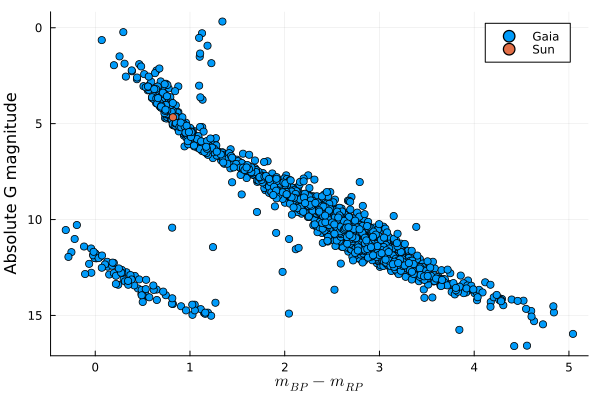

In [13]:
gaia_data = CSV.read("gaia_100pc_par_over_err_100.csv", header=1, DataFrame)

plot(xlabel=L"$m_{BP}-m_{RP}$", ylabel="Absolute G magnitude")
color = gaia_data.phot_bp_mean_mag - gaia_data.phot_rp_mean_mag
distance_pc = 1 ./ (1e-3.*gaia_data.parallax)
abs_G = gaia_data.phot_g_mean_mag .- 5 .* (log10.(distance_pc).-1)

# Solar absolute magnitudes from Casagrande & VandenBerg (2018)
G_sun = 4.67
BP_sun = G_sun+0.33
RP_sun = G_sun-0.49

scatter!(color, abs_G,label="Gaia")
scatter!([BP_sun-RP_sun],[G_sun], label="Sun")
yflip!(true)

A lot of interesting structure comes right out of this figure. We have that most stars live in a narrow band which crosses the figure diagonally. This band is the main-sequence, and is populated by core-hydrogen burning stars. On the lower left of the diagram we see an additional band of stars, which are much fainter for a given color. These stars correspond to white dwarfs. Finally, and not so apparent, on the upper left of the main sequence there are a few objects which diverge to higher luminosities than the main sequence. These are stars on their red-giant branch. We will go through all of these types of stars later in this course.

Next up, we want to turn this into a theoretical Hertzprung-Russell diagram which shows the effective temperature $T_\mathrm{eff}$ versus the luminosity. For this we need to know how to transform the color into an effective temperature, and how to determine the luminosity of a star with a given absolute G band magnitude and color. We will start with the mapping from color to effective temperature. In all of this we will assume all stars radiate as black bodies with an unkown temperature. For a source with a temperature $T_\mathrm{eff}$ we can compute the magnitude in each band as

$$m_{BP}=-2.5\log_{10} F_{BP} + m_{0,BP},\quad m_{RP}=-2.5\log_{10} F_{RP} + m_{0,RP},$$

where the fluxes on each band are obtained by integrating a black body spectrum with the corresponding passband ($\varphi_{BP}(\lambda)$ or $\varphi_{RP}(\lambda)$) that were plotted earlier:

$$F_{BP} = C\int_0^\infty B_\lambda(\lambda,T) \varphi_{BP}(\lambda) d\lambda,\quad F_{RP}=C\int_0^\infty B_\lambda(\lambda,T) \varphi_{RP}(\lambda) d\lambda, \quad C=\pi \left(\frac{R}{d}\right)^2.$$

The two zero-points $m_{0,BP}$ and $m_{0,RP}$ form part of the definition of the photometric system. Taking the difference between the magnitudes we obtain the color,

$$m_{BP}-m_{RP} = -2.5 \log_{10}\left(\frac{\int_0^\infty B_\lambda(\lambda,T) \varphi_{BP}(\lambda) d\lambda}{\int_0^\infty B_\lambda(\lambda,T) \varphi_{RP}(\lambda) d\lambda}\right) + m_{0,BP} - m_{0,RP}.$$ (zero_point1)

Taking the absolute magnitude of the Sun in the BP and RP bands, and assuming it radiates as a black body with $T=5772\;\mathrm{[K]}$, the difference between the zero-points can be expressed as (it does not make a difference if we use the absolute or apparent magnitude of the Sun here)

$$m_{0,BP} - m_{0,RP}= M_{BP,\odot}-M_{RP,\odot} + 2.5 \log_{10}\left(\frac{\int_0^\infty B_\lambda(\lambda,5772\;\mathrm{[K]}) \varphi_{BP}(\lambda) d\lambda}{\int_0^\infty B_\lambda(\lambda,5772\;\mathrm{[K]}) \varphi_{RP}(\lambda) d\lambda}\right).$$ (zero_point2)

Although we are getting the difference in the zero points by using an approximation of the Sun as a black body, a more formal approach would be to use the definition of the zero point of the GAIA photometric system, which uses the VEGAMAG system. In this system the zero points are set such that one particular star, Vega, has a magnitude of zero in all bands (or more specifally, a particular spectral model of Vega satisfies that). However, for this exercise, Vega is not ideal to use because it is a rapidly rotating star which cannot be well approximated with a blackbody spectrum. For details on this, you can check the section on [external calibration](https://gea.esac.esa.int/archive/documentation/GDR3/Data_processing/chap_cu5pho/cu5pho_sec_photProc/cu5pho_ssec_photCal.html) from the documentation of the third Gaia data release {cite}`vanLeeuwen+2022`.

Combining equations {eq}`zero_point1` and {eq}`zero_point2` we can infer the color $m_{BP}-m_{RP}$ of a source as a function of $T_\mathrm{eff}$. This is illustrated below.

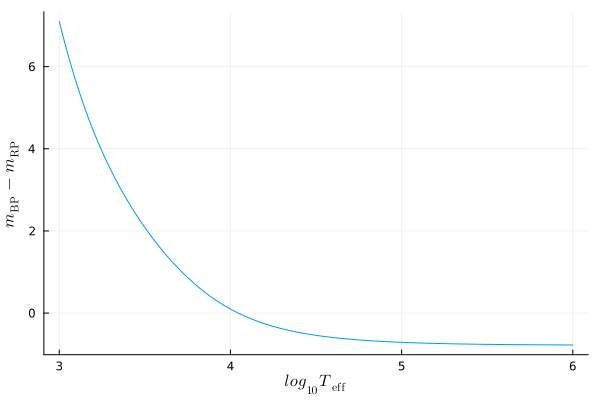

In [14]:
function flux_ratio_BP_RP(T)
    # Ignoring constant in the integration as we just care about the ratio, relying on bins being equally spaced in lambda
    F_sun_BP = sum(passbands.BP_pb .* B_λ.(passbands.lambda,T))
    F_sun_RP = sum(passbands.RP_pb .* B_λ.(passbands.lambda,T))
    return F_sun_BP/F_sun_RP
end

diff_zero_point_BP_RP = BP_sun - RP_sun + 2.5*log10(flux_ratio_BP_RP(5772))

# sample 
log10_T_sample = LinRange(3.0,6.0,100)
BP_sub_RP = -2.5*log10.(flux_ratio_BP_RP.(10 .^ log10_T_sample)) .+ diff_zero_point_BP_RP

plot(xlabel=L"$log_{10} T_\mathrm{eff}$",ylabel=L"$m_\mathrm{BP}-m_\mathrm{RP}$")
plot!(log10_T_sample, BP_sub_RP,label="")

Now, on our quest to turn the Gaia Hertzsprung-Russell diagram into one of effective temperature versus luminosity, we run into a small problem. We have found a way to get a color from an effective temperature but what we need is the inverse! The inverse function can be computed numerically using a bisection algorithm. From the plot above we see that the relationship between temperature and color is monotonic. If we have an upper and a lower bound on the temperature that corresponds to a given color, we can iteratively improve on these bounds by taking their average and seeing if this new value corresponds to an upper or a lower bound. This can be iterated upon until the upper and lower bounds are close enough (down to a specific tolerance). The function below implements such a bisection solver.

In [22]:
#bisection algorithm to get Teff from the color BP-RP
function log10_T_from_BP_minus_RP(BP_minus_RP)
    log10_T_min = 3.0 # lower bound
    log10_T_max = 6.0 # upper bound
    log10_T = 0.0 # initialize at an arbitrary value
    while abs(log10_T_min-log10_T_max) > 0.001 # Iterate until we reach this tolerance
        # bisect bounds
        log10_T = 0.5*(log10_T_max + log10_T_min)
        # evaluate the color that corresponds to this temperature
        BP_minus_RP_new = -2.5*log10.(flux_ratio_BP_RP(10^log10_T)) .+ diff_zero_point_BP_RP

        # Determine if the new value for log10_T is an upper or lower bound.
        # This relies on BP-RP decreasing monotonically with temperature
        if BP_minus_RP_new > BP_minus_RP # T too low, update lower limit
            log10_T_min = log10_T
        else # otherwise, update upper limit
            log10_T_max = log10_T
        end
    end
    return log10_T
end;

In [23]:
# we use the function defined above to compute log10_Teff for all our Gaia sources 
log10_T = log10_T_from_BP_minus_RP.(color); #remember that color is defined as BP-RP

We can make use of this to make a $T_\mathrm{eff}$ versus absolute G magnitude diagram.

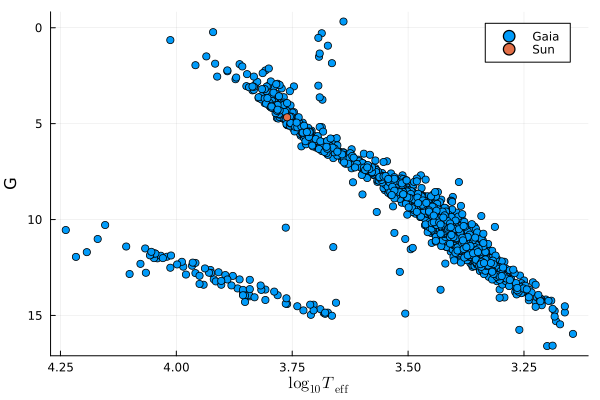

In [17]:
plot(xlabel=L"$\log_{10}T_\mathrm{eff}$", ylabel="Absolute G magnitude")

scatter!(log10_T, abs_G,label="Gaia")
scatter!([log10_T_from_BP_minus_RP(BP_sun-RP_sun)],[G_sun],label="Sun")
yflip!(true)
xflip!(true)

We're almost there, just need to turn the y-axis into a luminosity! To do this, we first compute the ratio of flux in the G band versus the total flux for a source at a given temperature. Since we have that $F_\lambda = \pi B_\lambda$ and $F=\sigma T^4$ we find:

$$R(T)\equiv\frac{F_G}{F}=\frac{\pi}{\sigma T^4}\int_0^\infty B_\lambda(\lambda, T) \varphi_G(\lambda)d\lambda.$$

Below we illustrate this ratio as a function of temperature.

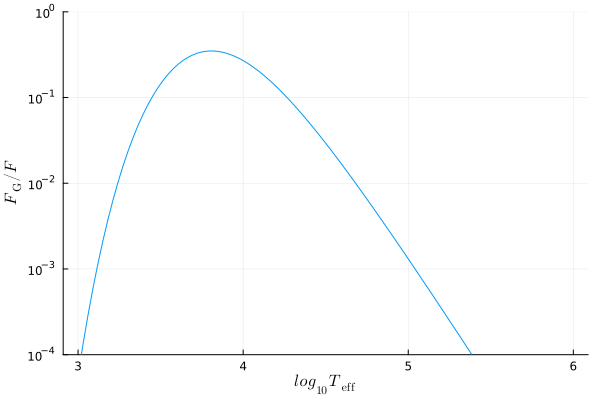

In [18]:
function flux_ratio_G_total(T)
    # This numerical integration relies on bins being spaced by a nanometer in the passband data
    F_G = π*sum(passbands.G_pb .* B_λ.(passbands.lambda,T) .*1e-7)
    return F_G/(σ*T^4)
end

plot(xlabel=L"$log_{10} T_\mathrm{eff}$",ylabel=L"$F_\mathrm{G}/F$", yscale=:log, ylims=[1e-4,1], legend=false)
plot!(log10_T_sample, flux_ratio_G_total.(10 .^ log10_T_sample)) # log10_T_sample is an array defined previously, and goes from log10(T)=3 to 6

As can be seen, if the temperature is pushed to very low or very high values we only capture a miniscule amount of the total light. This means that we have little information on the total luminosity and we can expect issues to appear when trying to convert from a G band magnitude to a total bolometric luminosity.

And now for the last step, how do we use this to convert from an absolute G magnitude to the bolometric luminosity? If we substract the absolute G magnitude of the Sun to that of another star we obtain

$$M_{G} - M_{G,\odot} = -2.5 \log_{10}\left(\frac{L_{G}}{L_{G,\odot}}\right),$$ (abs_G_1)

where $L_G$ stands for the luminosity of the star weighted by the G filter passband,

$$L_G=\int_0^{\infty} L_\lambda \varphi(\lambda)d\lambda$$

and $L_\lambda$ is the luminosity per unit wavelength. Equation {eq}`abs_G_1` can be rewritten as

$$M_{G} - M_{G,\odot} = -2.5\times\left[\log_{10}\left(\frac{L_{G}}{L}\right)+\log_{10}\left(\frac{L}{L_{\odot}}\right)+\log_{10}\left(\frac{L_\odot}{L_{G,\odot}}\right)\right].$$

The ratio between the luminosity of a source and its G band is just the quantity $R(T)$ we have computed before. Using the corresponding temperature for the Sun and solving for $\log_{10}(L/L_\odot)$ we get

$$\log_{10}\left(\frac{L}{L_\odot}\right)=\frac{M_{G,\odot}-M_{G}}{2.5} - \log_{10}(R(T)) + \log_{10}(R(5772\;\mathrm{K})),$$

and remember that the temperature can be inferred from the color. With this we can complete our Hertzsprung-Russell diagram. As a check, we also include the predicted properties for stars on the zero-age main-sequence, which is the beginning of the core-hydrogen burning phase in the evolution of a star. These values of $L$ and $T_\mathrm{eff}$ come from the results of {cite}`Schaller+1992` and {cite}`Charbonnel+1999` and cover masses between $0.4 M_\odot$ and $2.5 M_\odot$.

In [19]:
log10_L_div_Lsun = (G_sun .- abs_G)./(2.5) .-
    log10.(flux_ratio_G_total.(10 .^ log10_T)) .+ log10.(flux_ratio_G_total.(5772));

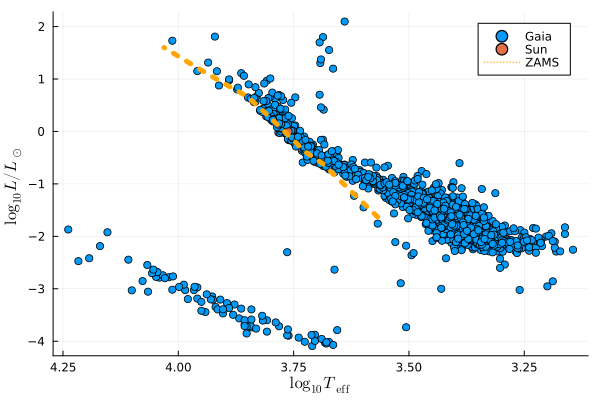

In [20]:
plot(xlabel=L"$\log_{10}T_\mathrm{eff}$", ylabel=L"\log_{10}L/L_\odot")

# Predicted Zero-age main-sequence location for stars of masses (in Msun):
#     0.4, 0.8, 0.9, 1.0, 1.25, 1.5, 1.7, 2, 2.5
# All models except that with M=0.4 Msun are from Schaller et al. (1992).
# Model at 0.4 Msun is from Charbonnel et al. (1999).
# These results were computed using the Geneva stellar evolution code
log10_T_geneva = [3.568, 3.687, 3.724, 3.751, 3.808, 3.852, 3.901, 3.958, 4.031]
log10_L_geneva = [-1.63, -0.612, -0.394, -0.163, 0.325, 0.676, 0.916, 1.209, 1.600]

scatter!(log10_T, log10_L_div_Lsun, label="Gaia")
scatter!([log10_T_from_BP_minus_RP(BP_sun-RP_sun)],[0], label="Sun")
plot!(log10_T_geneva, log10_L_geneva, linewidth=5, linestyle= :dot, color="orange", label="ZAMS")
xflip!(true)

Here we see that the predicted zero-age main-sequence matches well the observed stars except at low luminosities and effective temperatures. This is not entirely surprising, as for those low temperatures we have already seen that the Gaia filters only cover a small fraction of the total luminosity of the star.

Feel free to further play with this data. For instance, using $L=4\pi R^2\sigma T_\mathrm{eff}^4$ you can determine the radii of these stars, and compare how much the radii in the main-sequence differ from those of the white dwarfs.